<a href="https://colab.research.google.com/github/StephenJohnson-CardiffUni/Astro/blob/main/SunSpot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install uncertainties

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
'''Script to take and process sun data from given .fits files
Manually taking down x,y,datetime for each sunspot'''
import uncertainties as uc 

SOLAR = [ [] for _ in range(14) ]

SOLAR[1] = {
'DATE_OBS':[2002,1,1],
'T':[1,35,30,150],
'CENTER_X':5.124912719727E+02,
'CENTER_Y':5.121821899414E+02,
'R_SUN':4.976492972133E+02,
1:[uc.ufloat(236,1),uc.ufloat(578,1)],
2:[uc.ufloat(356,1),uc.ufloat(589,1)],
3:[uc.ufloat(458,1),uc.ufloat(642,1)],
4:[uc.ufloat(673,1),uc.ufloat(499,1)],
5:[uc.ufloat(699,1),uc.ufloat(656,1)],
6:[uc.ufloat(740,1),uc.ufloat(674,1)],
7:[uc.ufloat(118,1),uc.ufloat(358,1)]
}

SOLAR[2] = {
'DATE_OBS':[2002,1,2],
'T':[6,23,30,143],
'CENTER_X':5.126451416016E+02,
'CENTER_Y':5.121716308594E+02,
'R_SUN':4.976459074648E+02,
1:[uc.ufloat(359,1),uc.ufloat(582,1)],
2:[uc.ufloat(490,1),uc.ufloat(588,1)],
3:[uc.ufloat(593,1),uc.ufloat(624,1)],
4:[uc.ufloat(798,1),uc.ufloat(497,1)],
5:[uc.ufloat(811,1),uc.ufloat(655,1)],
6:[uc.ufloat(857,1),uc.ufloat(639,1)],
7:[uc.ufloat(206,1),uc.ufloat(363,1)]
}

SOLAR[3] = {
'DATE_OBS':[2002,1,3],
'T':[20,43,30,137],
'CENTER_X':5.129639485677E+02,
'CENTER_Y':5.121700744629E+02,
'R_SUN':4.976371283928E+02,
1:[uc.ufloat(537,1),uc.ufloat(586,1)],
2:[uc.ufloat(671,1),uc.ufloat(585,1)],
3:[uc.ufloat(760,1),uc.ufloat(622,1)],
4:[uc.ufloat(861,1),uc.ufloat(467,1)],
5:[uc.ufloat(927,1),uc.ufloat(648,1)],
6:[uc.ufloat(959,1),uc.ufloat(631,1)],
7:[uc.ufloat(361,1),uc.ufloat(367,1)],
8:[uc.ufloat(44,1),uc.ufloat(385,1),]
}

SOLAR[4] = {
'DATE_OBS':[2002,1,5],
'T':[11,11,30,133],
'CENTER_X':5.128095703125E+02,
'CENTER_Y':5.121723937988E+02,
'R_SUN':4.976233208255E+02,
1:[uc.ufloat(741,1),uc.ufloat(586,1)],
2:[uc.ufloat(832,1),uc.ufloat(579,1)],
3:[uc.ufloat(895,1),uc.ufloat(616,1)],
4:[uc.ufloat(950,1),uc.ufloat(468,1)],
7:[uc.ufloat(530,1),uc.ufloat(373,1)],
8:[uc.ufloat(110,1),uc.ufloat(394,1)],
9:[uc.ufloat(126,1),uc.ufloat(645,1)]
}

SOLAR[5] = {
'DATE_OBS':[2002,1,6],
'T':[20,27,30,132],
'CENTER_X':5.129006856283E+02,
'CENTER_Y':5.121798197428E+02,
'R_SUN':4.976072535491E+02,
1:[uc.ufloat(849,1),uc.ufloat(580,1)],
7:[uc.ufloat(674,1),uc.ufloat(375,1)],
8:[uc.ufloat(211,1),uc.ufloat(402,1)],
9:[uc.ufloat(236,1),uc.ufloat(652,1)]
}

SOLAR[6] = {
'DATE_OBS':[2002,1,7],
'T':[23,59,30,131],
'CENTER_X':5.128635253906E+02,
'CENTER_Y':5.121746215820E+02,
'R_SUN':4.975910001418E+02,
1:[uc.ufloat(935,1),uc.ufloat(572,1)],
7:[uc.ufloat(782,1),uc.ufloat(373,1)],
8:[uc.ufloat(318,1),uc.ufloat(405,1)],
9:[uc.ufloat(352,1),uc.ufloat(656,1)],
10:[uc.ufloat(90,1),uc.ufloat(755,1)]
}

SOLAR[7] = {
'DATE_OBS':[2002,1,9],
'T':[6,23,30,130],
'CENTER_X':5.128635253906E+02,
'CENTER_Y':5.121746215820E+02,
'R_SUN':4.975910001418E+02,
1:[uc.ufloat(993,1),uc.ufloat(562,1)],
7:[uc.ufloat(880,1),uc.ufloat(366,1)],
8:[uc.ufloat(451,1),uc.ufloat(406,1)],
9:[uc.ufloat(512,1),uc.ufloat(663,1)],
10:[uc.ufloat(140,1),uc.ufloat(767,1)],
11:[uc.ufloat(70,1),uc.ufloat(382,1)]
}

SOLAR[8] = {
'DATE_OBS':[2002,1,10],
'T':[11,11,30,130],
'CENTER_X':5.127472534180E+02,
'CENTER_Y':5.121821594238E+02,
'R_SUN':4.975698944716E+02,
7:[uc.ufloat(945,1),uc.ufloat(360,1)],
8:[uc.ufloat(581,1),uc.ufloat(404,1)],
9:[uc.ufloat(657,1),uc.ufloat(659,1)],
10:[uc.ufloat(210,1),uc.ufloat(755,1)],
11:[uc.ufloat(150,1),uc.ufloat(408,1)]
}

SOLAR[9] = {
'DATE_OBS':[2002,1,11],
'T':[19,11,30,129],
'CENTER_X':5.131047363281E+02,
'CENTER_Y':5.122049255371E+02,
'R_SUN':4.975174082688E+02,
7:[uc.ufloat(979,1),uc.ufloat(350,1)],
8:[uc.ufloat(720,1),uc.ufloat(399,1)],
9:[uc.ufloat(800,1),uc.ufloat(653,1)],
10:[uc.ufloat(214,1),uc.ufloat(780,1)],
11:[uc.ufloat(260,1),uc.ufloat(420,1)],
12:[uc.ufloat(58,1),uc.ufloat(480,1)],
13:[uc.ufloat(40,1),uc.ufloat(581,1)],
15:[uc.ufloat(36,1),uc.ufloat(318,1)]
}

SOLAR[10] = {
'DATE_OBS':[2002,1,12],
'T':[23,59,30,128],
'CENTER_X':5.130963745117E+02,
'CENTER_Y':5.122990417480E+02,
'R_SUN':4.974876625971E+02,
8:[uc.ufloat(828,1),uc.ufloat(391,1)],
9:[uc.ufloat(899,1),uc.ufloat(644,1)],
10:[uc.ufloat(423,1),uc.ufloat(783,1)],
11:[uc.ufloat(379,1),uc.ufloat(425,1)],
12:[uc.ufloat(130,1),uc.ufloat(492,1)],
13:[uc.ufloat(97,1),uc.ufloat(589,1)],
14:[uc.ufloat(39,1),uc.ufloat(431,1)],
15:[uc.ufloat(75,1),uc.ufloat(627,1)]
}

SOLAR[11] = {
'DATE_OBS':[2002,1,14],
'T':[6,23,30,127],
'CENTER_X':5.128045349121E+02,
'CENTER_Y':5.123047180176E+02,
'R_SUN':4.974528064124E+02,
8:[uc.ufloat(916,1),uc.ufloat(382,1)],
9:[uc.ufloat(968,1),uc.ufloat(636,1)],
10:[uc.ufloat(545,1),uc.ufloat(784,1)],
11:[uc.ufloat(523,1),uc.ufloat(423,1)],
12:[uc.ufloat(236,1),uc.ufloat(502,1)],
13:[uc.ufloat(191,1),uc.ufloat(598,1)],
14:[uc.ufloat(154,1),uc.ufloat(636,1)],
15:[uc.ufloat(90,1),uc.ufloat(440,1)]
}

SOLAR[12] = {
'DATE_OBS':[2002,1,15],
'T':[11,11,30,125],
'CENTER_X':5.128045349121E+02,
'CENTER_Y':5.123047180176E+02,
'R_SUN':4.974528064124E+02,
8:[uc.ufloat(696,1),uc.ufloat(375,1)],
10:[uc.ufloat(658,1),uc.ufloat(783,1)],
11:[uc.ufloat(653,1),uc.ufloat(422,1)],
12:[uc.ufloat(359,1),uc.ufloat(309,1)],
13:[uc.ufloat(307,1),uc.ufloat(605,1)],
14:[uc.ufloat(170,1),uc.ufloat(447,1)],
15:[uc.ufloat(257,1),uc.ufloat(642,1)]
}

SOLAR[13] = {
'DATE_OBS':[2002,1,16],
'T':[17,35,30,123],
'CENTER_X':5.130968627930E+02,
'CENTER_Y':5.122782287598E+02,
'R_SUN':4.973747211434E+02,
10:[uc.ufloat(767,1),uc.ufloat(778,1)],
11:[uc.ufloat(777,1),uc.ufloat(419,1)],
12:[uc.ufloat(502,1),uc.ufloat(513,1)],
13:[uc.ufloat(448,1),uc.ufloat(609,1)],
14:[uc.ufloat(283,1),uc.ufloat(453,1)],
15:[uc.ufloat(386,1),uc.ufloat(485,1)]
}


Fresh, "straight from the photos" data above, Preperation of data for use bellow

In [3]:
'''
Repack Data to be "spot focused" rather than the current "picture focus"
Pictures 1->14
Sunspots 1->15
Each data needs poss[0], date[1],time[2], lat[3], long[4]
'''
import uncertainties.umath as um #um.asin | um.degrees
import numpy as np
import datetime

spots = [[[[] for i in range(14)] for i in range(5)] for i in range(16)]

for i in range(1,14):#pictures
  for j in range(1,16):#spots

    #Fast esc
    if SOLAR[i].get(j) == None:
      continue
    
    spots[j][0][i] = SOLAR[i].get(j) #X,Y

    spots[j][1][i] = datetime.date(SOLAR[i].get('DATE_OBS')[0],SOLAR[i].get('DATE_OBS')[1],SOLAR[i].get('DATE_OBS')[2])#date as datetime object
    spots[j][2][i] = SOLAR[i].get('T') #time - maybe useless

    #lat
    spots[j][3][i] = um.degrees(um.asin( ((spots[j][0][i][1])-SOLAR[i].get("CENTER_Y")) / SOLAR[i].get("R_SUN") ))

    #long
    spots[j][4][i] = um.degrees(um.asin( ((spots[j][0][i][0])-SOLAR[i].get("CENTER_X")) / SOLAR[i].get("R_SUN") ))

In [4]:
'''Tidys out empty entries'''
cleanedList = spots
cleanedList = cleanedList[1:]

for i in range(14,-1,-1):
  # print(cleanedList[i])
  for j in range(4,-1,-1):
    # print(cleanedList[i][j])
    for k in range(13,-1,-1):
      #print(cleanedList[i][j][k])
      if cleanedList[i][j][k] == []:
        del cleanedList[i][j][k]

In [5]:
'''prepares the times for plotting'''
import matplotlib.dates as dts

timeList = [[] for i in range(16)] 

for i in range(len(cleanedList)):
  timeList[i].append(cleanedList[i][1])


for i in range(len(timeList)-1,-1,-1):
  for j in range(len(timeList[i])-1,-1,-1):
    timeList[i][j] = dts.date2num(timeList[i][j])

In [6]:
'''split by latitude'''
meanLats = []
for i in range(15):
  meanLats.append(np.abs(np.mean(cleanedList[i][3])))


'''<10 [0,1,3,11,12,13,14] , 10>x>20 [2,4,5,6,7,8,10] , <20 [9]''' 

'<10 [0,1,3,11,12,13,14] , 10>x>20 [2,4,5,6,7,8,10] , <20 [9]'

Plotting data

'This works when making the graph, but cannot get the nominal value in hlong without changing the origonal cleanedList Entry\nThis devistated the curve fit so commented out\n'

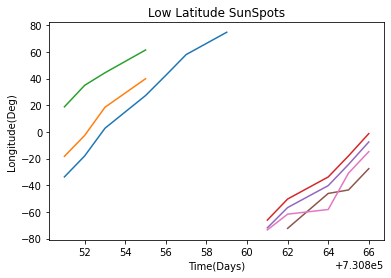

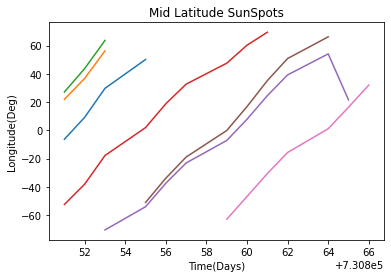

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

'''low lats'''
timeRange10=[]
longs10=[]
for i in [0,1,3,11,12,13,14]:
  timeRange10.append(timeList[i][0:])
  longs10.append(cleanedList[i][4:])


for i in range(len(timeRange10)):

  long10U = longs10[i] # dump into holder var to access .nominal_val
  long10N = long10U[0][:]
  for j in range(len(long10U[0])):
    long10N[j] = long10U[0][j].nominal_value
  plt.plot(timeRange10[i][0],long10N)

plt.xlabel("Time(Days)")
plt.ylabel("Longitude(Deg)")
plt.title("Low Latitude SunSpots")

plt.figure()


'''med lats'''
timeRange20=[]
longs20=[]
for i in [2,4,5,6,7,8,10]:
  timeRange20.append(timeList[i][0:])
  longs20.append(cleanedList[i][4:])

for i in range(len(timeRange20)):
  long20U = longs20[i]
  long20N = long20U[0][:]
  for j in range(len(long20U[0])):
    long20N[j] = long20U[0][j].nominal_value
  plt.plot(timeRange20[i][0],long20N)

plt.xlabel("Time(Days)")
plt.ylabel("Longitude(Deg)")
plt.title("Mid Latitude SunSpots")
plt.figure()


'''This works when making the graph, but cannot get the nominal value in hlong without changing the origonal cleanedList Entry
This devistated the curve fit so commented out
''' 
# '''one high lat'''
# HlongsU = []
# HlongsU.append(cleanedList[9][4])
# HlongN = list(HlongsU)
# for j in range(len(HlongsU[0])):
#   HlongN[0][j] = HlongsU[0][j].nominal_value
# plt.plot(timeList[9][0],HlongN[0])
# plt.xlabel("Time(Days)")
# plt.ylabel("Longitude(Deg)")
# plt.title("High Latitude SunSpots")

Curve Fit

Spot number 1 has a surface speed of (14.73+/-0.65) degrees/day
Spot number 2 has a surface speed of (15.00+/-1.67) degrees/day
Spot number 3 has a surface speed of (14.81+/-1.67) degrees/day
Spot number 4 has a surface speed of (11.07+/-1.43) degrees/day
Spot number 5 has a surface speed of (16.69+/-1.43) degrees/day
Spot number 6 has a surface speed of (17.78+/-1.02) degrees/day
Spot number 7 has a surface speed of (12.34+/-0.59) degrees/day
Spot number 8 has a surface speed of (8.65+/-1.48) degrees/day
Spot number 9 has a surface speed of (13.43+/-0.64) degrees/day
Spot number 10 has a surface speed of (10.70+/-0.82) degrees/day
Spot number 11 has a surface speed of (12.44+/-0.64) degrees/day
Spot number 12 has a surface speed of (12.66+/-1.19) degrees/day
Spot number 13 has a surface speed of (12.86+/-1.29) degrees/day
Spot number 14 has a surface speed of (10.34+/-2.03) degrees/day
Spot number 15 has a surface speed of (12.68+/-2.54) degrees/day


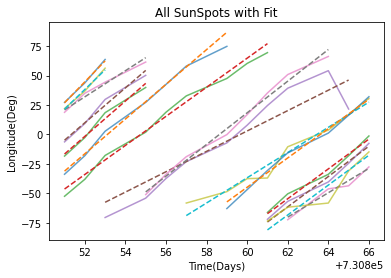

In [8]:
from scipy.optimize import curve_fit

def lineFunc(x,m,c):
  return (m*x)+c


#array for curvefitdatas tolive in
FullcurveData = [ [[]for i in range(2)] for i in range(len(timeList))]
speeds = [[] for x in range(15)]

for i in range(len(cleanedList)):
  allLongs = list(cleanedList[i][4])
  allN = list(allLongs)
  allS = list(allLongs)


  for j in range(len(allLongs)):
    allN[j] = allLongs[j].nominal_value
    allS[j] = allLongs[j].s

  popt,pcov = curve_fit(lineFunc,timeList[i][0],allN,sigma=allS)
  FullcurveData[i][0] = popt
  FullcurveData[i][1] = pcov
  plt.plot(timeList[i][0],allN,alpha=0.7)
  plt.plot(timeList[i][0],lineFunc(timeList[i][0],FullcurveData[i][0][0],FullcurveData[i][0][1]),"--")
  perr = np.sqrt(np.diag(FullcurveData[i][1]))
  print(f"Spot number {i+1} has a surface speed of ({FullcurveData[i][0][0]:.2f}+/-{perr[0]:.2f}) degrees/day")
  speeds[i] = uc.ufloat(FullcurveData[i][0][0],perr[0])
  
plt.xlabel("Time(Days)");
plt.ylabel("Longitude(Deg)");
plt.title("All SunSpots with Fit");

In [9]:
miniRadius = [[] for x in range(15)]
miniCumFence = [[] for x in range(15)]
kmPerDay = [[] for x in range(15)]

Rzero = uc.ufloat(695660000,140)

for i in range(15):
  miniRadius[i] = Rzero * um.cos(um.radians(meanLats[i]))
  miniCumFence[i] = miniRadius[i]*2*np.pi
  kmPerDay[i] = (miniCumFence[i]/360) * speeds[i]

  print(f"Spot {i+1}  :  Path radius ({miniRadius[i]:.2f}) : Path if full circle ({miniCumFence[i]:.2f}) : Km Traveled Per day ({kmPerDay[i]:.2f})")

Spot 1  :  Path radius (689545392.03+/-70532.23) : Path if full circle (4332541475.86+/-443167.06) : Km Traveled Per day (177325095.80+/-7866293.48)
Spot 2  :  Path radius (688118227.11+/-103770.62) : Path if full circle (4323574334.16+/-652010.05) : Km Traveled Per day (180125330.09+/-20065528.19)
Spot 3  :  Path radius (677210025.85+/-164302.71) : Path if full circle (4255036084.31+/-1032344.36) : Km Traveled Per day (175070212.69+/-19788115.90)
Spot 4  :  Path radius (694441733.58+/-41440.14) : Path if full circle (4363306097.11+/-260376.07) : Km Traveled Per day (134223904.39+/-17374633.74)
Spot 5  :  Path radius (667223036.71+/-238140.12) : Path if full circle (4192285980.87+/-1496278.49) : Km Traveled Per day (194354327.53+/-16635099.77)
Spot 6  :  Path radius (669204762.88+/-229392.65) : Path if full circle (4204737533.62+/-1441316.53) : Km Traveled Per day (207704848.60+/-11858755.39)
Spot 7  :  Path radius (664525695.37+/-144335.82) : Path if full circle (4175338085.41+/-90688

In [10]:
periods = [[] for x in range(15)]

for i in range(15):
  periods[i] = 360/speeds[i]
  print(f"{periods[i]:.2f}")

24.43+/-1.08
24.00+/-2.67
24.30+/-2.75
32.51+/-4.21
21.57+/-1.85
20.24+/-1.16
29.17+/-1.41
41.63+/-7.12
26.80+/-1.27
33.65+/-2.56
28.94+/-1.50
28.43+/-2.67
27.98+/-2.80
34.83+/-6.83
28.40+/-5.68


In [11]:
#Synodic => Sidereal
sidereal = [[] for x in range(15)]

for i in range(15):
  sidereal[i] = (periods[i]*365.25)/(periods[i]+365.25)
  print(f"{sidereal[i]:.2f}")

22.90+/-0.95
22.52+/-2.35
22.79+/-2.42
29.85+/-3.55
20.37+/-1.65
19.18+/-1.04
27.02+/-1.20
37.37+/-5.73
24.97+/-1.10
30.81+/-2.15
26.82+/-1.28
26.38+/-2.30
25.99+/-2.42
31.80+/-5.69
26.35+/-4.89


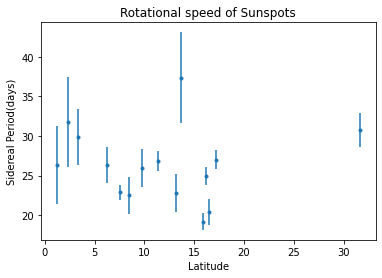

In [12]:
#plot latitude vs sidereal
siderealNorm = [[] for x in range(15)]
siderealUn = [[] for x in range(15)]

latNorm = [[] for x in range(15)]
latUn = [[] for x in range(15)]

for i in range(15):
  siderealNorm[i] = sidereal[i].n
  siderealUn[i] = sidereal[i].s
  latNorm[i] = meanLats[i].n
  latUn[i] = meanLats[i].s

plt.errorbar(latNorm,siderealNorm,siderealUn,latUn,'.');
plt.xlabel("Latitude");
plt.ylabel("Sidereal Period(days)");
plt.title("Rotational speed of Sunspots");

In [13]:
#split by lat 5 degree increments
firstLatNorm = []
firstLatUn = []
firstSiderealNorm = []
firstSiderealUn = []

secondLatNorm = []
secondLatUn = []
secondSiderealNorm = []
secondSiderealUn = []

thirdLatNorm = []
thirdLatUn = []
thirdSiderealNorm = []
thirdSiderealUn = []

forthLatNorm = []
forthLatUn = []
forthSiderealNorm = []
forthSiderealUn = []

fithLatNorm = []
fithLatUn = []
fithSiderealNorm = []
fithSiderealUn = []

for i in range(len(latNorm)):
  if latNorm[i] < 5:
    firstLatNorm.append(latNorm[i])
    firstLatUn.append(latUn[i])
    firstSiderealNorm.append(siderealNorm[i])
    firstSiderealUn.append(siderealUn[i])
  elif latNorm[i] > 5 and latNorm[i] < 10:
    secondLatNorm.append(latNorm[i])
    secondLatUn.append(latUn[i])
    secondSiderealNorm.append(siderealNorm[i])
    secondSiderealUn.append(siderealUn[i])
  elif latNorm[i] > 10 and latNorm[i] < 15:
    thirdLatNorm.append(latNorm[i])
    thirdLatUn.append(latUn[i])
    thirdSiderealNorm.append(siderealNorm[i])
    thirdSiderealUn.append(siderealUn[i])
  elif latNorm[i] > 15 and latNorm[i] < 20:
    forthLatNorm.append(latNorm[i])
    forthLatUn.append(latUn[i])
    forthSiderealNorm.append(siderealNorm[i])
    forthSiderealUn.append(siderealUn[i])
  elif latNorm[i] > 20:
    fithLatNorm.append(latNorm[i])
    fithLatUn.append(latUn[i])
    fithSiderealNorm.append(siderealNorm[i])
    fithSiderealUn.append(siderealUn[i])

/usr/local/lib/python3.8/dist-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


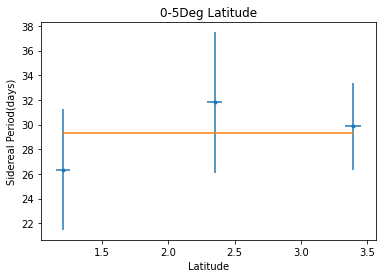

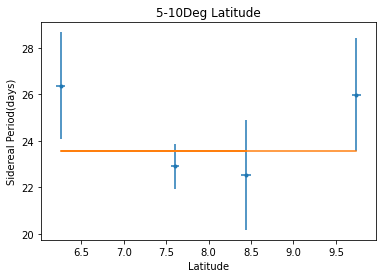

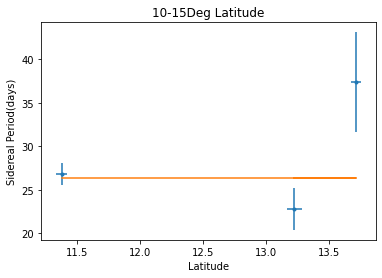

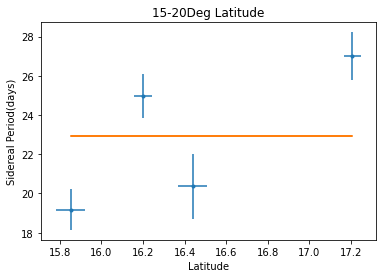

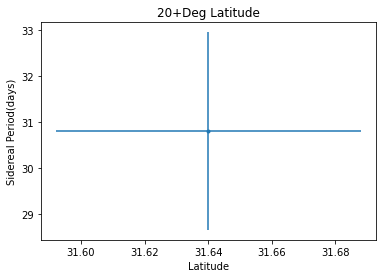

In [14]:
#plot the 5 degree bins for speed vs lat, Run curve fit, 
def flatLine(x,c):
  return c

#0-5

plt.figure()
firstpopt,firstpcov = curve_fit(flatLine,firstLatNorm,firstSiderealNorm,28,firstSiderealUn)
firstPeriod = uc.ufloat(firstpopt,np.sqrt(np.diag(firstpcov)))

plt.errorbar(firstLatNorm,firstSiderealNorm,firstSiderealUn,firstLatUn,'.');
plt.plot(firstLatNorm,(firstpopt,firstpopt,firstpopt));
plt.xlabel("Latitude");
plt.ylabel("Sidereal Period(days)");
plt.title("0-5Deg Latitude");

#5-10
plt.figure()
secondpopt,secondpcov = curve_fit(flatLine,secondLatNorm,secondSiderealNorm,24,secondSiderealUn)
secondPeriod = uc.ufloat(secondpopt,np.sqrt(np.diag(secondpcov)))

plt.errorbar(secondLatNorm,secondSiderealNorm,secondSiderealUn,secondLatUn,'.');
plt.plot(secondLatNorm,(secondpopt,secondpopt,secondpopt,secondpopt));
plt.xlabel("Latitude");
plt.ylabel("Sidereal Period(days)");
plt.title("5-10Deg Latitude");

#10-15
plt.figure()
thirdpopt,thirdpcov = curve_fit(flatLine,thirdLatNorm,thirdSiderealNorm,28,thirdSiderealUn)
thirdPeriod = uc.ufloat(thirdpopt,np.sqrt(np.diag(thirdpcov)))

plt.errorbar(thirdLatNorm,thirdSiderealNorm,thirdSiderealUn,thirdLatUn,'.');
plt.plot(thirdLatNorm,(thirdpopt,thirdpopt,thirdpopt));
plt.xlabel("Latitude");
plt.ylabel("Sidereal Period(days)");
plt.title("10-15Deg Latitude");

#15-20
plt.figure()
forthpopt,forthpcov = curve_fit(flatLine,forthLatNorm,forthSiderealNorm,28,forthSiderealUn)
forthPeriod = uc.ufloat(forthpopt,np.sqrt(np.diag(forthpcov)))

plt.errorbar(forthLatNorm,forthSiderealNorm,forthSiderealUn,forthLatUn,'.');
plt.plot(forthLatNorm,(forthpopt,forthpopt,forthpopt,forthpopt));
plt.xlabel("Latitude");
plt.ylabel("Sidereal Period(days)");
plt.title("15-20Deg Latitude");

#20+
plt.figure()
fithpopt,fithpcov = curve_fit(flatLine,fithLatNorm,fithSiderealNorm,28,fithSiderealUn)
fithPeriod = uc.ufloat(fithpopt,np.sqrt(np.diag(fithpcov)))

plt.errorbar(fithLatNorm,fithSiderealNorm,fithSiderealUn,fithLatUn,'.');
plt.plot(fithLatNorm,(fithpopt));
plt.xlabel("Latitude");
plt.ylabel("Sidereal Period(days)");
plt.title("20+Deg Latitude");

Angular Momentum

In [15]:
#solar consts
R = uc.ufloat(695660000,140000) #Haberreiter, Schmutz & Kosovichev (2008)
M = uc.ufloat(1.98847*10**30,0.00007*10**30) #The Astronomical Almanac. (2014). p2.#
TotVol = (4/3)*(np.pi)*(R**3)
daySeconds = 24*60*60

'''L = Iw
I = (mr**2)/2

working backwards

find m, find r, for slices
use to calc I

Calc w from periods

use I and w to calc L for segments 
'''

'L = Iw\nI = (mr**2)/2\n\nworking backwards\n\nfind m, find r, for slices\nuse to calc I\n\nCalc w from periods\n\nuse I and w to calc L for segments \n'

In [16]:
#geometries for volumes

firstH = R*np.sin(np.deg2rad(5))
firstr = R*np.cos(np.deg2rad(2.5)) # midpoint of cylinder
firstV = np.pi*firstH*(firstr**2)
firstFraction = (firstV/TotVol)*2
firstMass = firstFraction*M
firstI = (firstMass*(firstr**2))/2
firstw = (2*np.pi)/(firstPeriod*daySeconds)
firstL = firstI*firstw

secondH = (R*np.sin(np.deg2rad(10))) - firstH
secondr = (R*np.cos(np.deg2rad(7.5)))
secondV = np.pi*secondH*(secondr**2)
secondFraction = (secondV/TotVol)*2
secondMass = secondFraction*M
secondI = (secondMass*(secondr**2))/2
secondw = (2*np.pi)/(secondPeriod*daySeconds)
secondL = secondI*secondw

thirdH = (R*np.sin(np.deg2rad(15))) - firstH - secondH
thirdr = (R*np.cos(np.deg2rad(12.5)))
thirdV = np.pi*secondH*(secondr**2)
thirdFraction = (thirdV/TotVol)*2
thirdMass = thirdFraction*M
thirdI = (thirdMass*(thirdr**2))/2
thirdw = (2*np.pi)/(thirdPeriod*daySeconds)
thirdL = thirdI*thirdw

forthH = (R*np.sin(np.deg2rad(20))) - firstH - secondH - thirdH
forthr = (R*np.cos(np.deg2rad(17.5)))
forthV = np.pi*forthH*(forthr**2)
forthFraction = (forthV/TotVol)*2
forthMass = forthFraction*M
forthI = (forthMass*(forthr**2))/2
forthw = (2*np.pi)/(forthPeriod*daySeconds)
forthL = forthI*forthw

totalFraction = 1-(firstFraction+secondFraction+thirdFraction+forthFraction)

In [17]:
print(f"The angular momentum for the equitorial belt of the sun is {firstL:.3e} kg⋅m2⋅s−1")
print(f"The angular momentum for the latitudes (+-)5-10 is {secondL:.3e} kg⋅m2⋅s−1")
print(f"The angular momentum for the latitudes (+-)10-15 is {thirdL:.3e} kg⋅m2⋅s−1")
print(f"The angular momentum for the latitudes (+-)15-20 is {forthL:.3e} kg⋅m2⋅s−1")

The angular momentum for the equitorial belt of the sun is (1.556+/-0.073)e+41 kg⋅m2⋅s−1
The angular momentum for the latitudes (+-)5-10 is (1.860+/-0.063)e+41 kg⋅m2⋅s−1
The angular momentum for the latitudes (+-)10-15 is (1.614+/-0.118)e+41 kg⋅m2⋅s−1
The angular momentum for the latitudes (+-)15-20 is (1.574+/-0.130)e+41 kg⋅m2⋅s−1


In [20]:
totalL = firstL + secondL + thirdL + forthL
print(totalL)

(6.60+/-0.20)e+41


In [19]:
totalFraction

0.5009419729947253+/-7.237830359838992e-20

In [22]:
print(totalL*2)

(1.32+/-0.04)e+42
